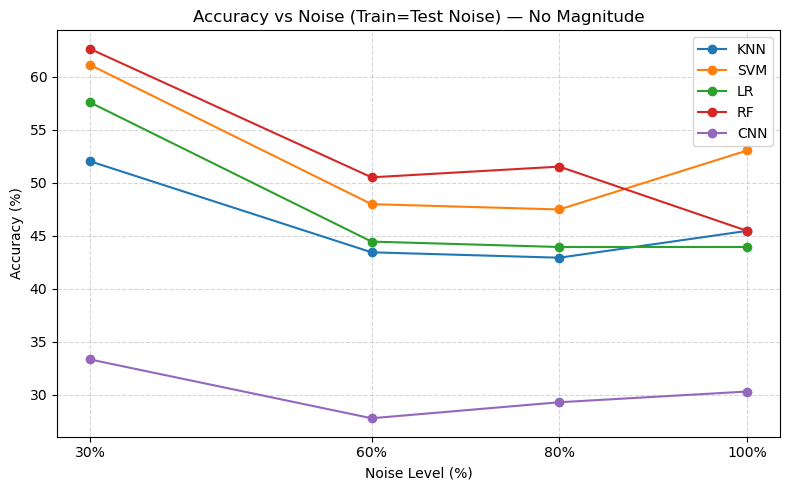

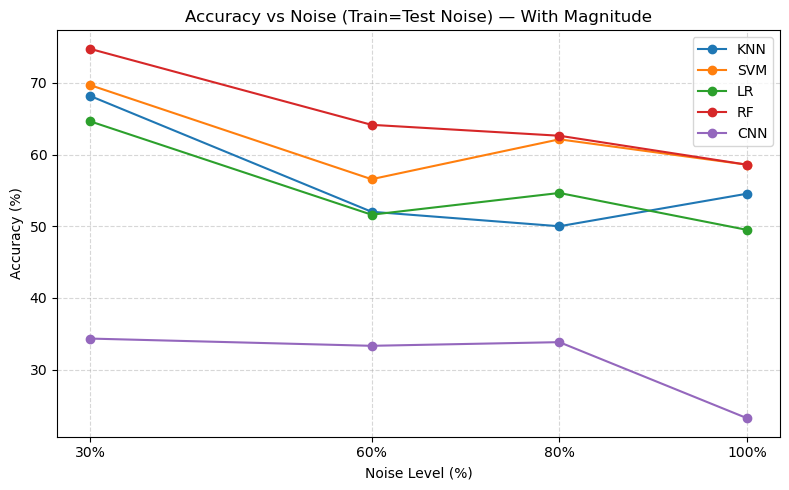

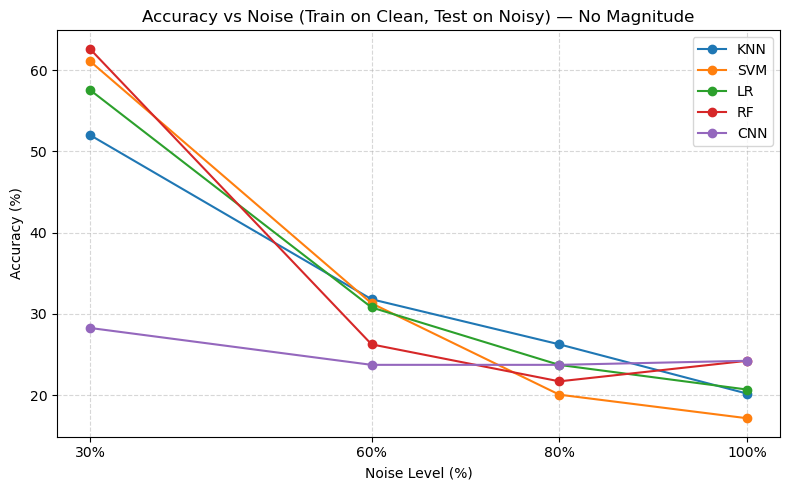

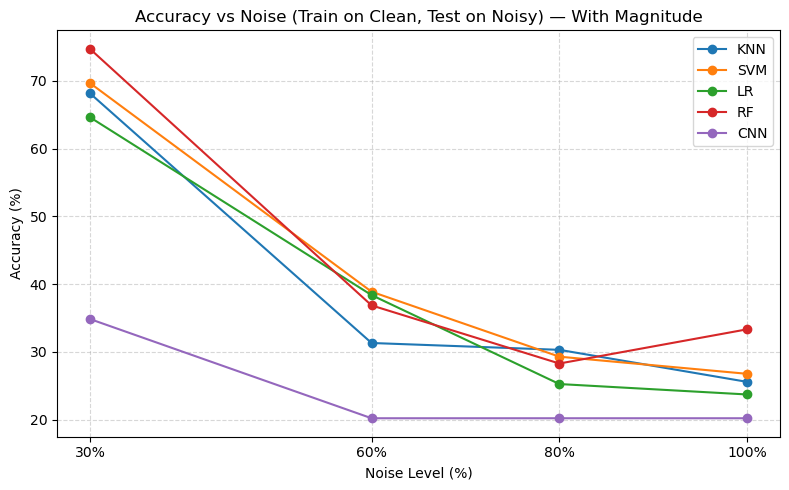

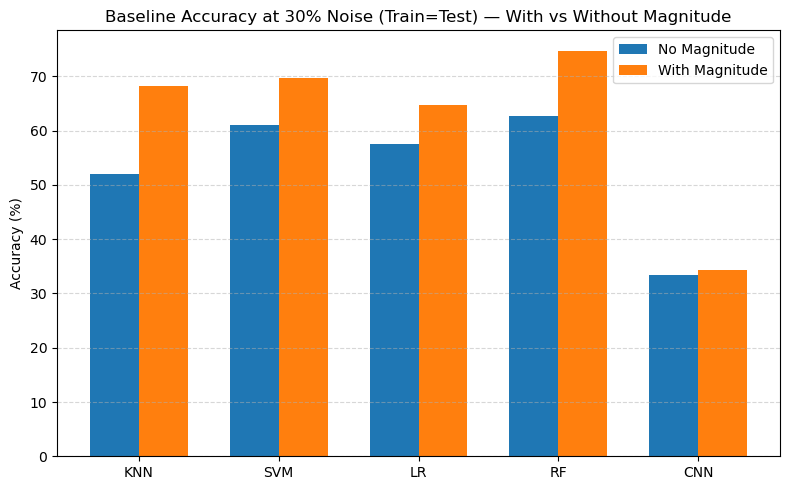

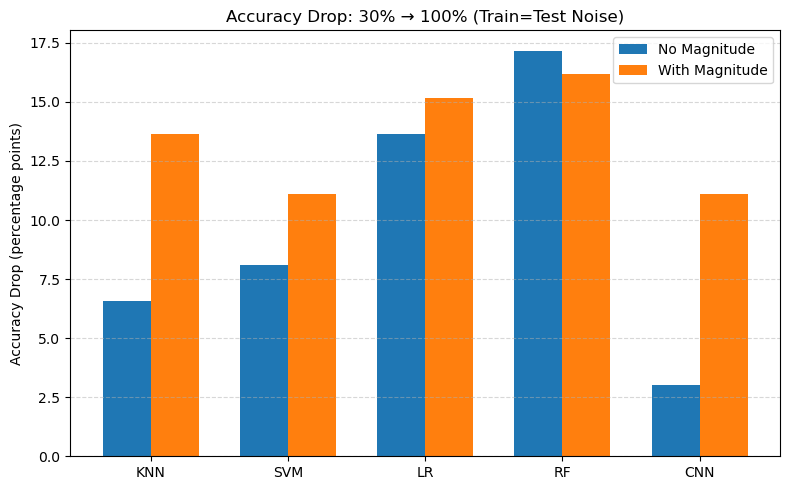

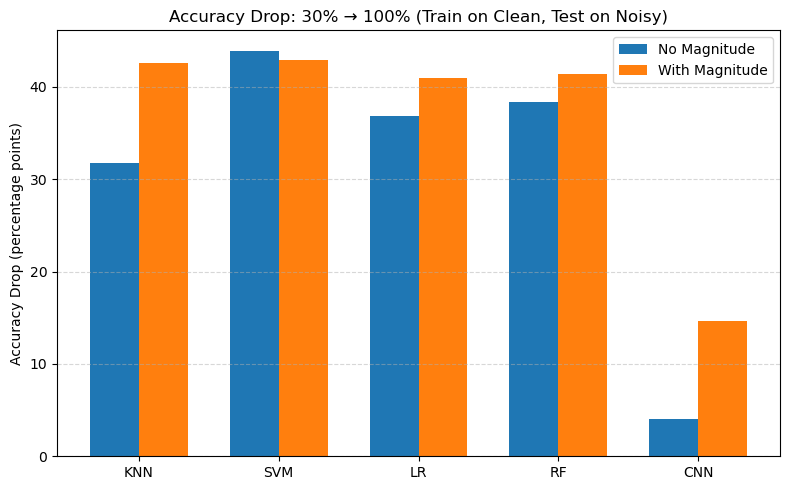

Saved figures:
 - thesis_plots\nm_no_mag_line.png
 - thesis_plots\nm_with_mag_line.png
 - thesis_plots\ct_no_mag_line.png
 - thesis_plots\ct_with_mag_line.png
 - thesis_plots\baseline_30pct_bar.png
 - thesis_plots\drop_nm_bar.png
 - thesis_plots\drop_ct_bar.png
Saved CSVs:
 - thesis_plots\nm_no_mag.csv
 - thesis_plots\nm_with_mag.csv
 - thesis_plots\ct_no_mag.csv
 - thesis_plots\ct_with_mag.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

OUT_DIR = "thesis_plots"
os.makedirs(OUT_DIR, exist_ok=True)

noise_levels = [30, 60, 80, 100]
models = ["KNN", "SVM", "LR", "RF", "CNN"]

Train/Test on same noise level (Noise-Matched)
nm_no_mag = {
    "KNN": [52.02, 43.43, 42.92, 45.45],
    "SVM": [61.11, 47.97, 47.47, 53.03],
    "LR":  [57.57, 44.44, 43.93, 43.93],
    "RF":  [62.62, 50.50, 51.51, 45.45],
    "CNN": [33.33, 27.78, 29.29, 30.30],
}
nm_with_mag = {
    "KNN": [68.18, 52.02, 50.00, 54.54],
    "SVM": [69.69, 56.56, 62.12, 58.58],
    "LR":  [64.64, 51.61, 54.64, 49.49],
    "RF":  [74.74, 64.14, 62.62, 58.58],
    "CNN": [34.34, 33.33, 33.84, 23.23],
}

Train on Clean (30%), Test on Noisy (varied)
ct_no_mag = {
    "KNN": [52.02, 31.81, 26.26, 20.20],
    "SVM": [61.11, 31.31, 20.07, 17.17],
    "LR":  [57.57, 30.80, 23.73, 20.70],
    "RF":  [62.62, 26.26, 21.71, 24.24],
    "CNN": [28.28, 23.74, 23.74, 24.24],
}
ct_with_mag = {
    "KNN": [68.18, 31.31, 30.30, 25.57],
    "SVM": [69.69, 38.88, 29.29, 26.76],
    "LR":  [64.64, 38.38, 25.25, 23.71],
    "RF":  [74.74, 36.86, 28.28, 33.33],
    "CNN": [34.85, 20.20, 20.20, 20.20],
}

def plot_lines(title, results_dict, fname, x_vals=noise_levels):
    plt.figure(figsize=(8, 5))
    for m in models:
        y = results_dict[m]
        plt.plot(x_vals, y, marker="o", label=m)
    plt.xlabel("Noise Level (%)")
    plt.ylabel("Accuracy (%)")
    plt.title(title)
    plt.xticks(x_vals, [f"{n}%" for n in x_vals])
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    out_path = os.path.join(OUT_DIR, fname)
    plt.show()
    plt.close()
    return out_path

def bar_two_series(title, x_labels, series_a, label_a, series_b, label_b, fname, ylabel):
    x_idx = np.arange(len(x_labels))
    width = 0.35
    plt.figure(figsize=(8, 5))
    plt.bar(x_idx - width/2, series_a, width, label=label_a)
    plt.bar(x_idx + width/2, series_b, width, label=label_b)
    plt.xticks(x_idx, x_labels)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    out_path = os.path.join(OUT_DIR, fname)
    plt.show()
    plt.close()
    return out_path

def save_csv(df: pd.DataFrame, fname: str):
    out_path = os.path.join(OUT_DIR, fname)
    df.to_csv(out_path)
    return out_path

#Line Plots
paths = []
paths.append(plot_lines("Accuracy vs Noise (Train=Test Noise) — No Magnitude", nm_no_mag, "nm_no_mag_line.png"))
paths.append(plot_lines("Accuracy vs Noise (Train=Test Noise) — With Magnitude", nm_with_mag, "nm_with_mag_line.png"))
paths.append(plot_lines("Accuracy vs Noise (Train on Clean, Test on Noisy) — No Magnitude", ct_no_mag, "ct_no_mag_line.png"))
paths.append(plot_lines("Accuracy vs Noise (Train on Clean, Test on Noisy) — With Magnitude", ct_with_mag, "ct_with_mag_line.png"))

#Baseline (30%) bar chart — With vs Without Magnitude
baseline_clean_no_mag = [nm_no_mag[m][0] for m in models]
baseline_clean_with_mag = [nm_with_mag[m][0] for m in models]
paths.append(
    bar_two_series(
        "Baseline Accuracy at 30% Noise (Train=Test) — With vs Without Magnitude",
        models,
        baseline_clean_no_mag, "No Magnitude",
        baseline_clean_with_mag, "With Magnitude",
        "baseline_30pct_bar.png",
        "Accuracy (%)",
    )
)

#accuracy drop when training on relative noise to test
drop_nm_no_mag = [nm_no_mag[m][0] - nm_no_mag[m][-1] for m in models]
drop_nm_with_mag = [nm_with_mag[m][0] - nm_with_mag[m][-1] for m in models]
paths.append(
    bar_two_series(
        "Accuracy Drop: 30% → 100% (Train=Test Noise)",
        models,
        drop_nm_no_mag, "No Magnitude",
        drop_nm_with_mag, "With Magnitude",
        "drop_nm_bar.png",
        "Accuracy Drop (percentage points)",
    )
)

#accuracy drop trained on clean tested on nois
drop_ct_no_mag = [ct_no_mag[m][0] - ct_no_mag[m][-1] for m in models]
drop_ct_with_mag = [ct_with_mag[m][0] - ct_with_mag[m][-1] for m in models]
paths.append(
    bar_two_series(
        "Accuracy Drop: 30% → 100% (Train on Clean, Test on Noisy)",
        models,
        drop_ct_no_mag, "No Magnitude",
        drop_ct_with_mag, "With Magnitude",
        "drop_ct_bar.png",
        "Accuracy Drop (percentage points)",
    )
)


#saving locally
df_nm_no_mag   = pd.DataFrame(nm_no_mag,   index=[f"{n}%" for n in noise_levels])
df_nm_with_mag = pd.DataFrame(nm_with_mag, index=[f"{n}%" for n in noise_levels])
df_ct_no_mag   = pd.DataFrame(ct_no_mag,   index=[f"{n}%" for n in noise_levels])
df_ct_with_mag = pd.DataFrame(ct_with_mag, index=[f"{n}%" for n in noise_levels])

csv_paths = []
csv_paths.append(save_csv(df_nm_no_mag,   "nm_no_mag.csv"))
csv_paths.append(save_csv(df_nm_with_mag, "nm_with_mag.csv"))
csv_paths.append(save_csv(df_ct_no_mag,   "ct_no_mag.csv"))
csv_paths.append(save_csv(df_ct_with_mag, "ct_with_mag.csv"))

print("Saved figures:")
for p in paths:
    print(" -", p)
print("Saved CSVs:")
for p in csv_paths:
    print(" -", p)

